# Feature selection - SRANK
Nel notebook `SRANK_results.ipynb` abbiamo determinato la score di importanza per ogni feature, ora applichiamo questa conoscenza alla feature selection.
La logica è la seguente:
* Dato un algoritmo tipo k-Means, parto con la feature più importante e trovo il valore ottimale di cluster
* In seguito aggiungo la seconda feature e trovo il valore ottimale di cluster
* Così fino ad aver esaurito tutte le features
* Alla fine confronto i risultati ottenut i per il numero di feature migliore

# Cosa si osserva
Con il set di feature attuale si ottengono buoni risultati con l'algoritmo k-means e agglomerativo. Il set di features è piuttosto buono dalla terza alla ottava feature, quindi clustering fatto usando dalle 3 alle 8 variabili in ordine di importanza.
L'algoritmo di meanshift invece è pressochè inutile.
> NB: il valore -2 negli indici è posto di default se tutti i dati sono raggruppati in un solo cluster.

> NB2: si vede che le prime due variabili permettono un clustering pressochè perfetto, è perchè sono due variabili binarie. Quindi per forza.

Vale la pena ora osservare come si distribuiscono i dati con il k-means secondo i vari gruppi di features, dalle 3 alle 8.. cercando la situazione migliore.


In [5]:
#############################################
#   IMPORT                                  #
#############################################
#librerie
import pandas as pd 
import numpy as np
from dataset_extended_class import dataframe_ext
from sklearn import preprocessing
from evaluation_relative import clustering_evaluation
#dataset
df = pd.read_csv("../DatasetClientClustering.csv", 
                 engine='c', 
                 sep=',', 
                 encoding='latin-1')
df = df.drop(df.columns[list(np.arange(8))], axis=1)
df = df.drop(columns=["ClientID"])
#seleziono le feature che mi interessa clusterizzare
current_investment = ["PortfolioRisk", "PortfolioHorizon", 
                      "AuM", "BondInvestments", "EquityInvestments",
                      "MoneyMarketInvestments", "OtherInvestments", "Cash"]
person_var = ["RiskPropension", "ClientInvestmentHorizon", 
              "ClientKnowledgeExperience", "ClientPotentialIndex",
              "IncomeHighLow", "Sex", "Age", "IncomeNeed", 
              "LongTermCareNeed", "ProtectionNeed",
              "InheritanceIndex", "PanicMood", "NoTrustInBanks"]
#DATASET CON I PUNTI - che riscalo
dataframe = dataframe_ext(df[person_var]).standardize().clean().df

#ora importo la tabella dei rankings
rankings = (pd.read_csv("SRANKresults.csv", sep = ";", index_col = [0])
             .sort_values(by = "score_final", ascending = False))
rankings

,feature,score_final
0,InheritanceIndex,309
1,Age,274
2,IncomeNeed,232
3,RiskPropension,216
4,ClientInvestmentHorizon,106
5,ClientKnowledgeExperience,81
6,ProtectionNeed,81
7,LongTermCareNeed,73
8,ClientPotentialIndex,68


 Best value of CH index:  64885.01639028935 
 Number of clusters for best value:  2 
 Number of clusters:  [2, 2, 2, 2, 2, 2, 2, 2, 2]

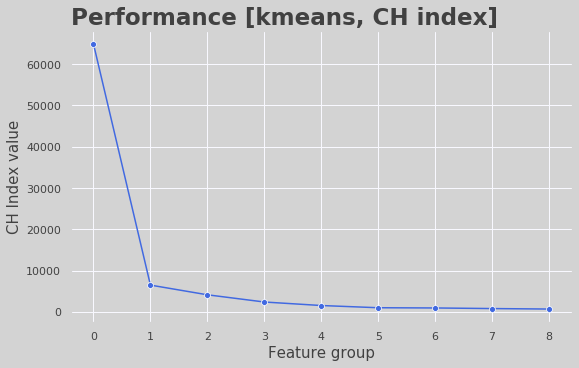

In [6]:
#############################################
#   K-MEANS - Calinski-Harabasz Index       #
#############################################
#si seleziona per ogni gruppo di feature il numero di cluster ottimale
#si confrontano poi i risultati ottimali per ogni gruppo di features
clustering_evaluation(dataframe, rankings, algo = "kmeans", eval_indexSTR = "CH")

 Best value of DB index:  0.512420981134659 
 Number of clusters for best value:  2 
 Number of clusters:  [2, 2, 2, 2, 2, 2, 2, 2, 2]

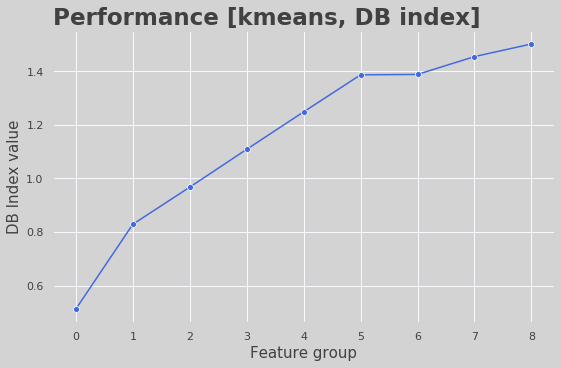

In [7]:
#############################################
#   K-MEANS - Davies-Bouldin Index       #
#############################################
#si seleziona per ogni gruppo di feature il numero di cluster ottimale
#si confrontano poi i risultati ottimali per ogni gruppo di features
clustering_evaluation(dataframe, rankings, algo = "kmeans", eval_indexSTR = "DB")

 Best value of sil index:  0.5252014005755423 
 Number of clusters for best value:  2 
 Number of clusters:  [2, 2, 2, 2, 2, 2, 2, 2, 2]

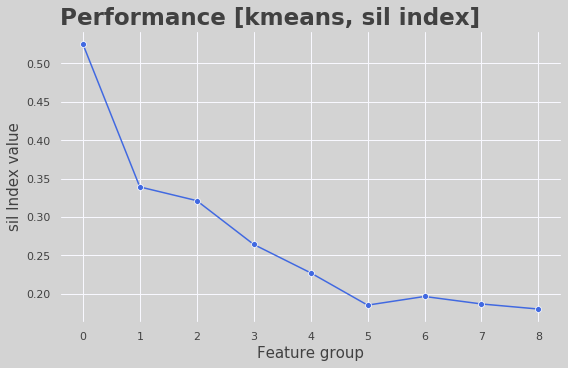

In [8]:
#############################################
#   K-MEANS - Silhouette Index              #
#############################################
#si seleziona per ogni gruppo di feature il numero di cluster ottimale
#si confrontano poi i risultati ottimali per ogni gruppo di features
clustering_evaluation(dataframe, rankings, algo = "kmeans", eval_indexSTR = "sil")

 Best value of CH index:  56526.51620854379 
 Number of clusters for best value:  2 
 Number of clusters:  [2, 2, 2, 2, 2, 2, 2, 2, 2]

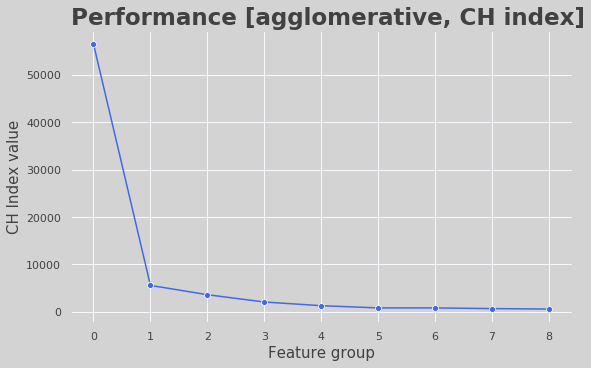

In [9]:
#############################################
#  Agglomerative - Calinski-Harabasz Index  #
#############################################
#si seleziona per ogni gruppo di feature il numero di cluster ottimale
#si confrontano poi i risultati ottimali per ogni gruppo di features
clustering_evaluation(dataframe, rankings, algo = "agglomerative", eval_indexSTR = "CH")

 Best value of DB index:  0.517856202155175 
 Number of clusters for best value:  2 
 Number of clusters:  [2, 2, 2, 2, 2, 2, 2, 2, 2]

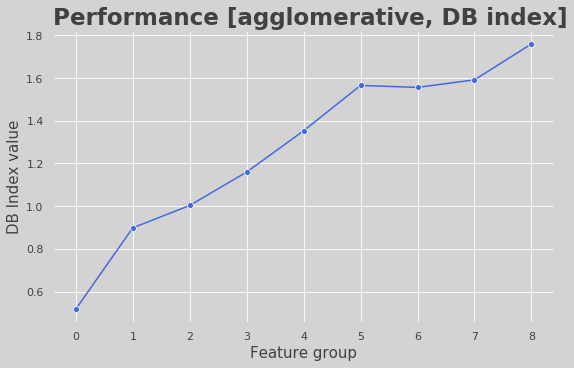

In [10]:
#############################################
#  Agglomerative - DB Index                 #
#############################################
#si seleziona per ogni gruppo di feature il numero di cluster ottimale
#si confrontano poi i risultati ottimali per ogni gruppo di features
clustering_evaluation(dataframe, rankings, algo = "agglomerative", eval_indexSTR = "DB")

 Best value of sil index:  0.4968130103403148 
 Number of clusters for best value:  2 
 Number of clusters:  [2, 2, 2, 2, 2, 2, 2, 2, 2]

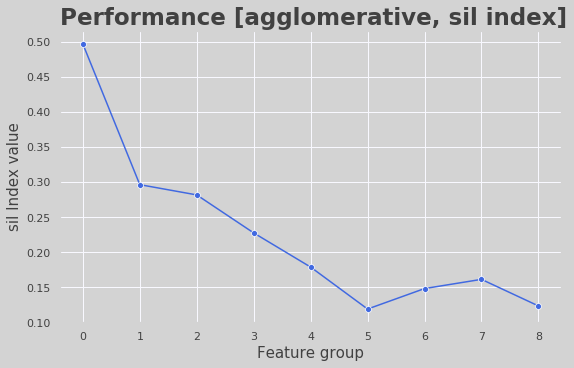

In [11]:
#############################################
#  Agglomerative - Silhouette Index         #
#############################################
#si seleziona per ogni gruppo di feature il numero di cluster ottimale
#si confrontano poi i risultati ottimali per ogni gruppo di features
clustering_evaluation(dataframe, rankings, algo = "agglomerative", eval_indexSTR = "sil")